In [1]:
%matplotlib inline   
#%matplotlib inline是在jupyter中嵌入显示
%config InlineBackend.figure_format = 'retina'#提高图片清晰度
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\\Windows\\Fonts\\simhei.ttf', size=14)


# 读取数据
data = pd.read_excel('covid19_data.xls', sheet_name='data_history')
# data['date'] = pd.to_datetime(data['date']).dt.strftime('%m-%d')


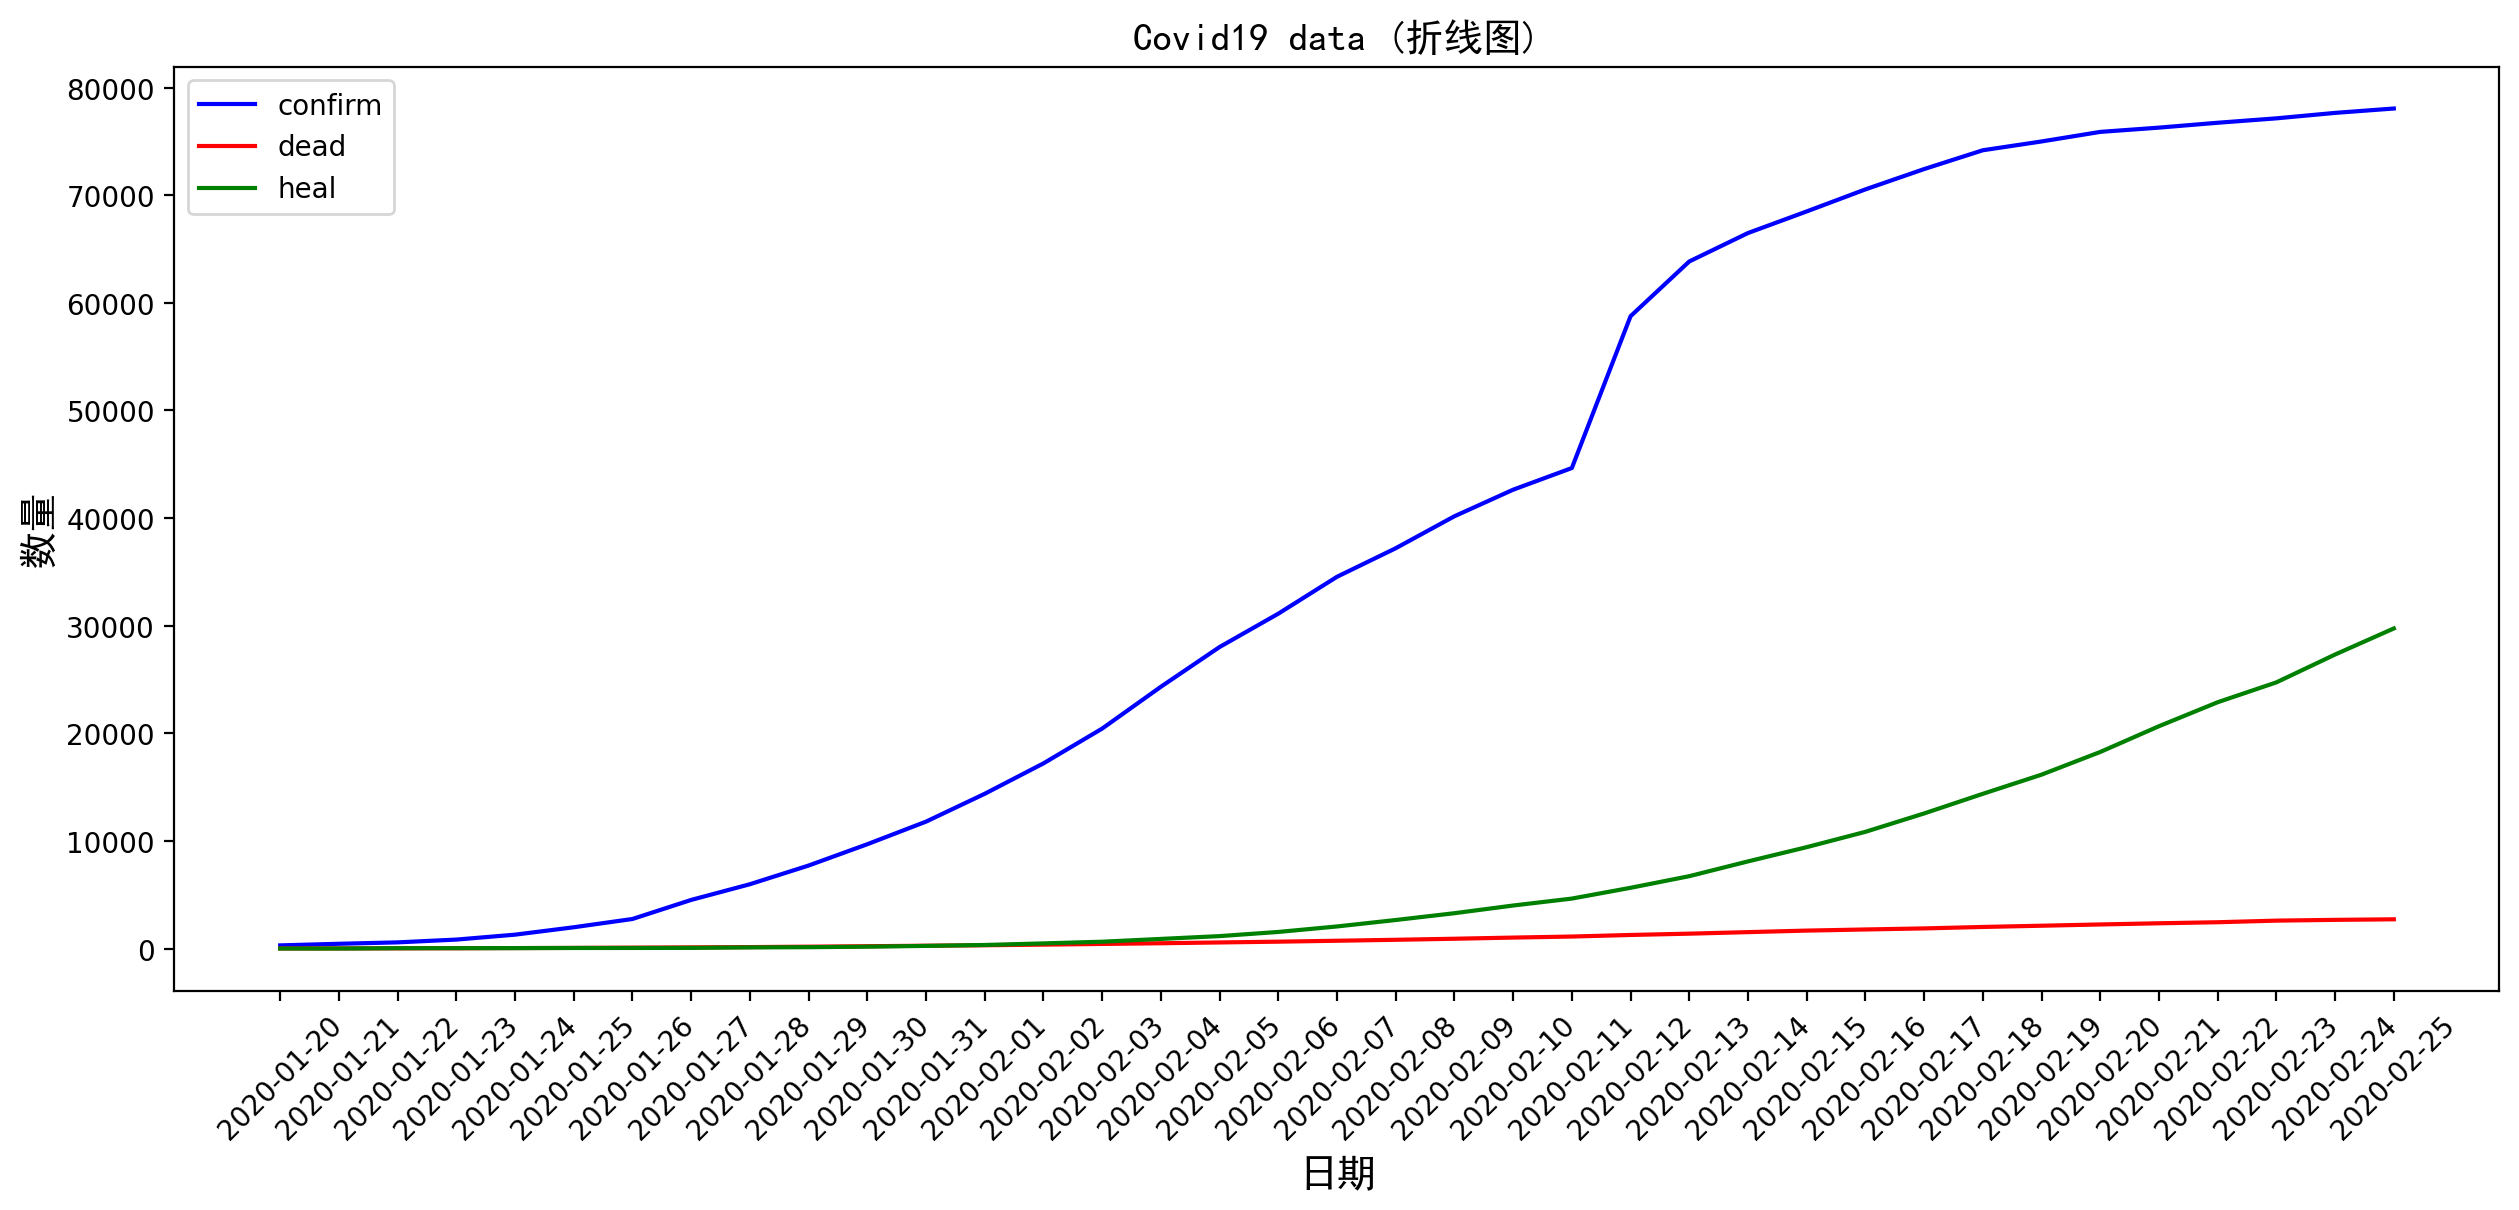

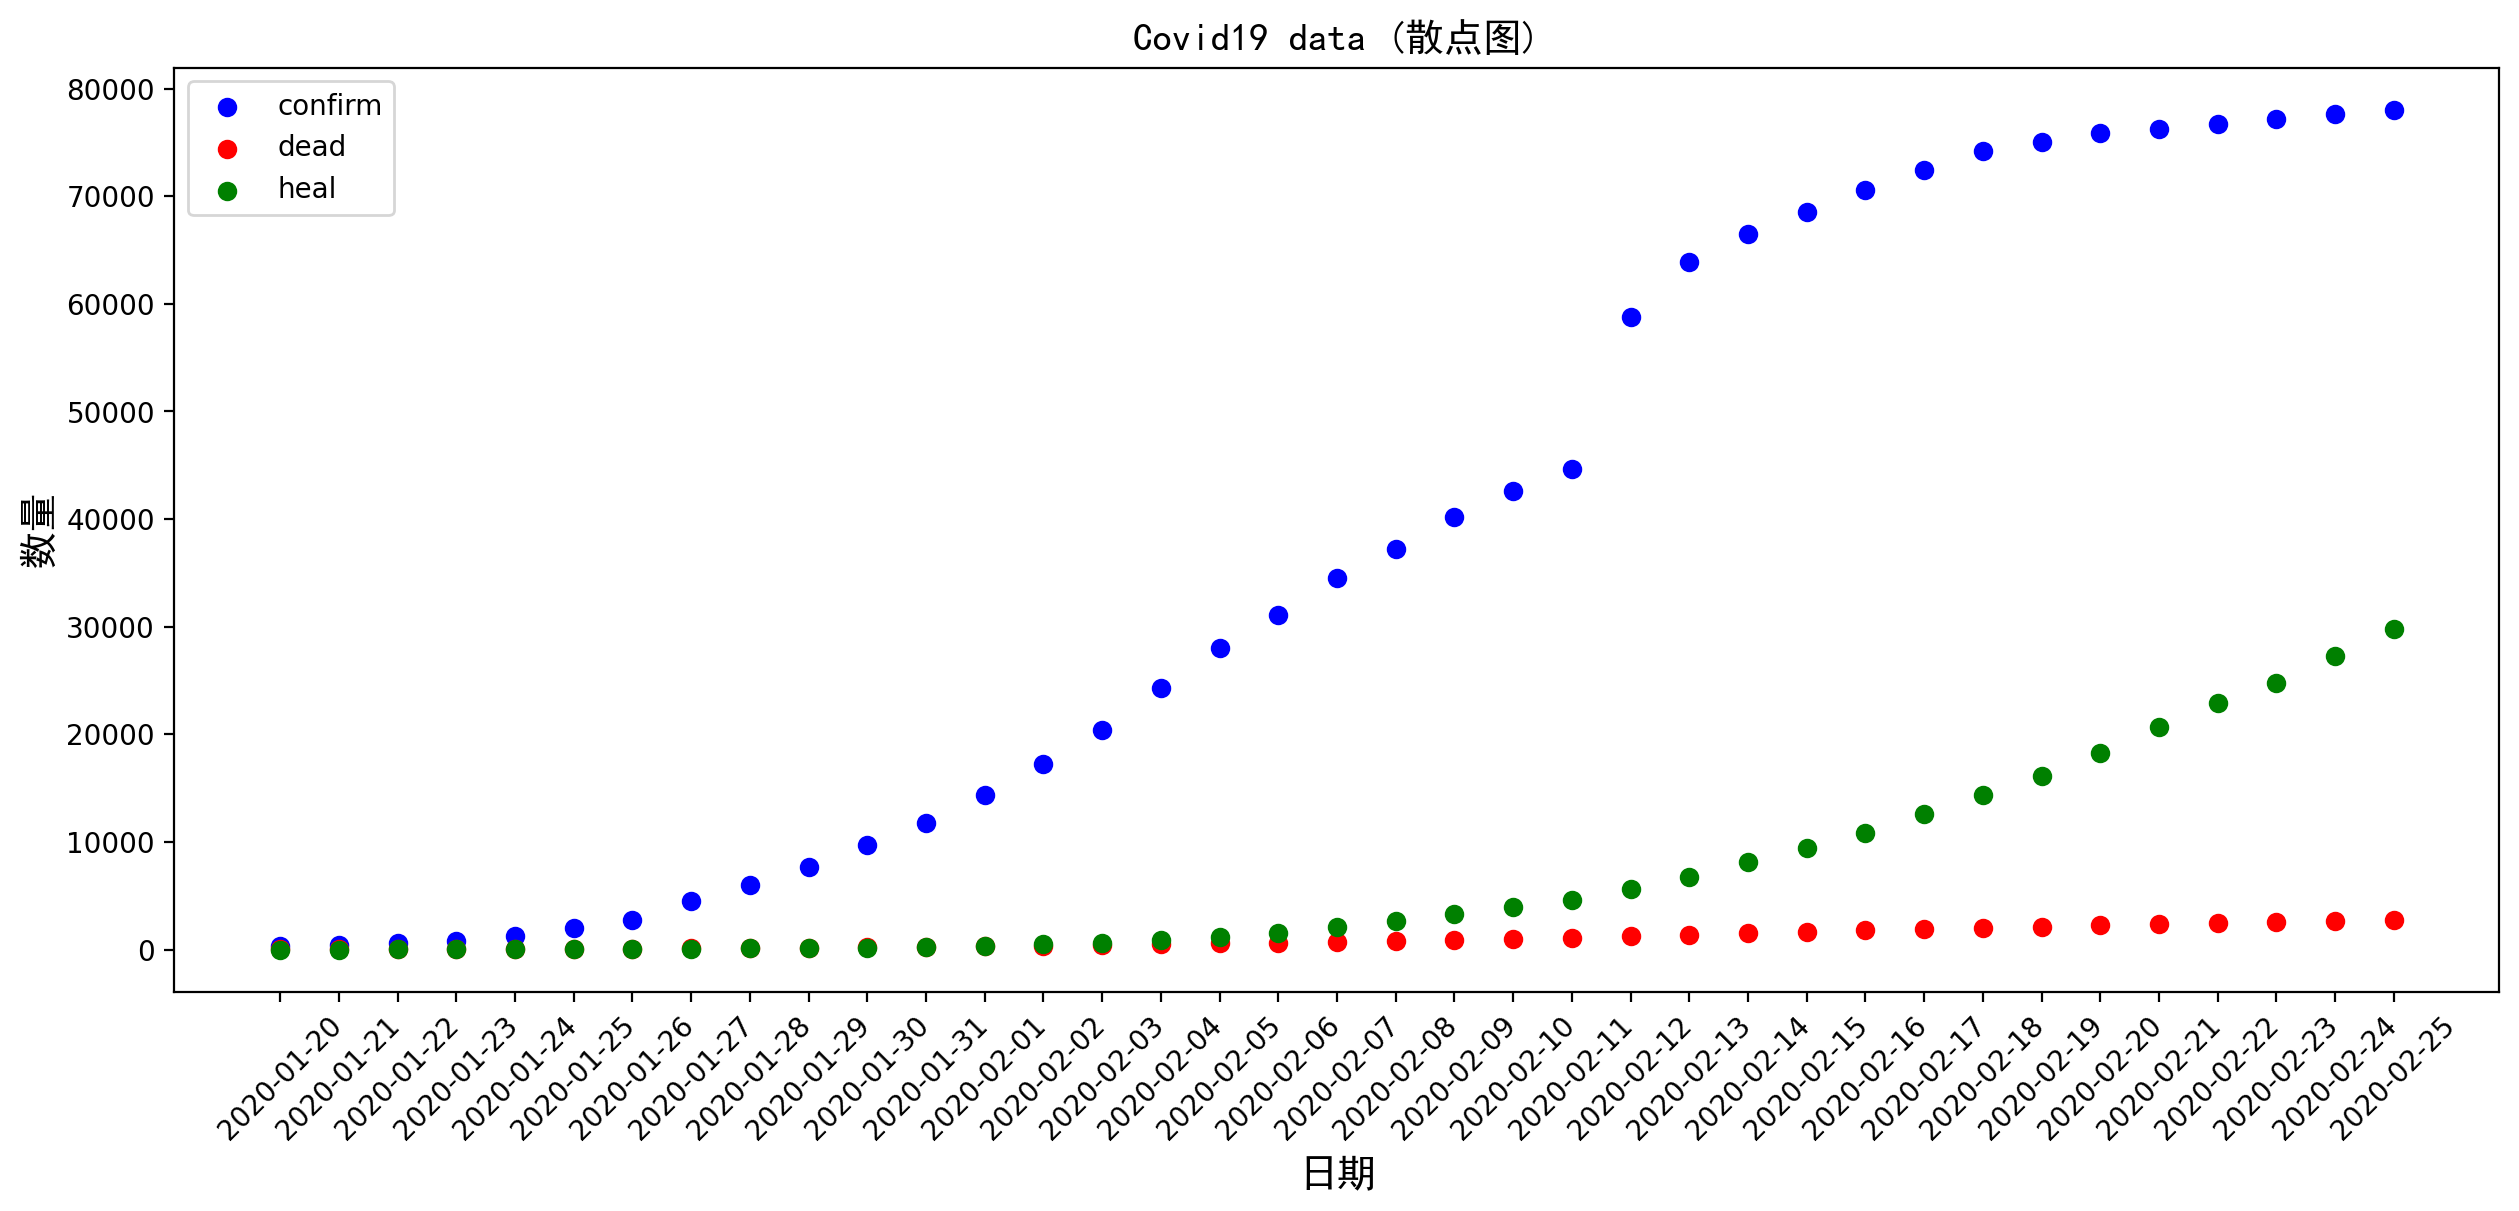

In [2]:

# 绘制折线图
plt.figure(figsize=(15,6))
plt.plot(data['date'], data['confirm'], color='blue', label='confirm')
plt.plot(data['date'], data['dead'], color='red', label='dead')
plt.plot(data['date'], data['heal'], color='green', label='heal')
plt.xlabel('日期', fontproperties=myfont)
plt.ylabel('数量', fontproperties=myfont)
plt.legend()
plt.title('Covid19 data (折线图)', fontproperties=myfont)
plt.xticks(rotation=45)
plt.savefig('./images/折线图.jpg')
plt.show()


# 绘制散点图
plt.figure(figsize=(15,6))
plt.scatter(data['date'], data['confirm'], color='blue', label='confirm')
plt.scatter(data['date'], data['dead'], color='red', label='dead')
plt.scatter(data['date'], data['heal'], color='green', label='heal')
plt.xlabel('日期', fontproperties=myfont)
plt.ylabel('数量', fontproperties=myfont)
plt.legend()
plt.title('Covid19 data (散点图)', fontproperties=myfont)
plt.xticks(rotation=45)
plt.savefig('./images/散点图.jpg')
plt.show()


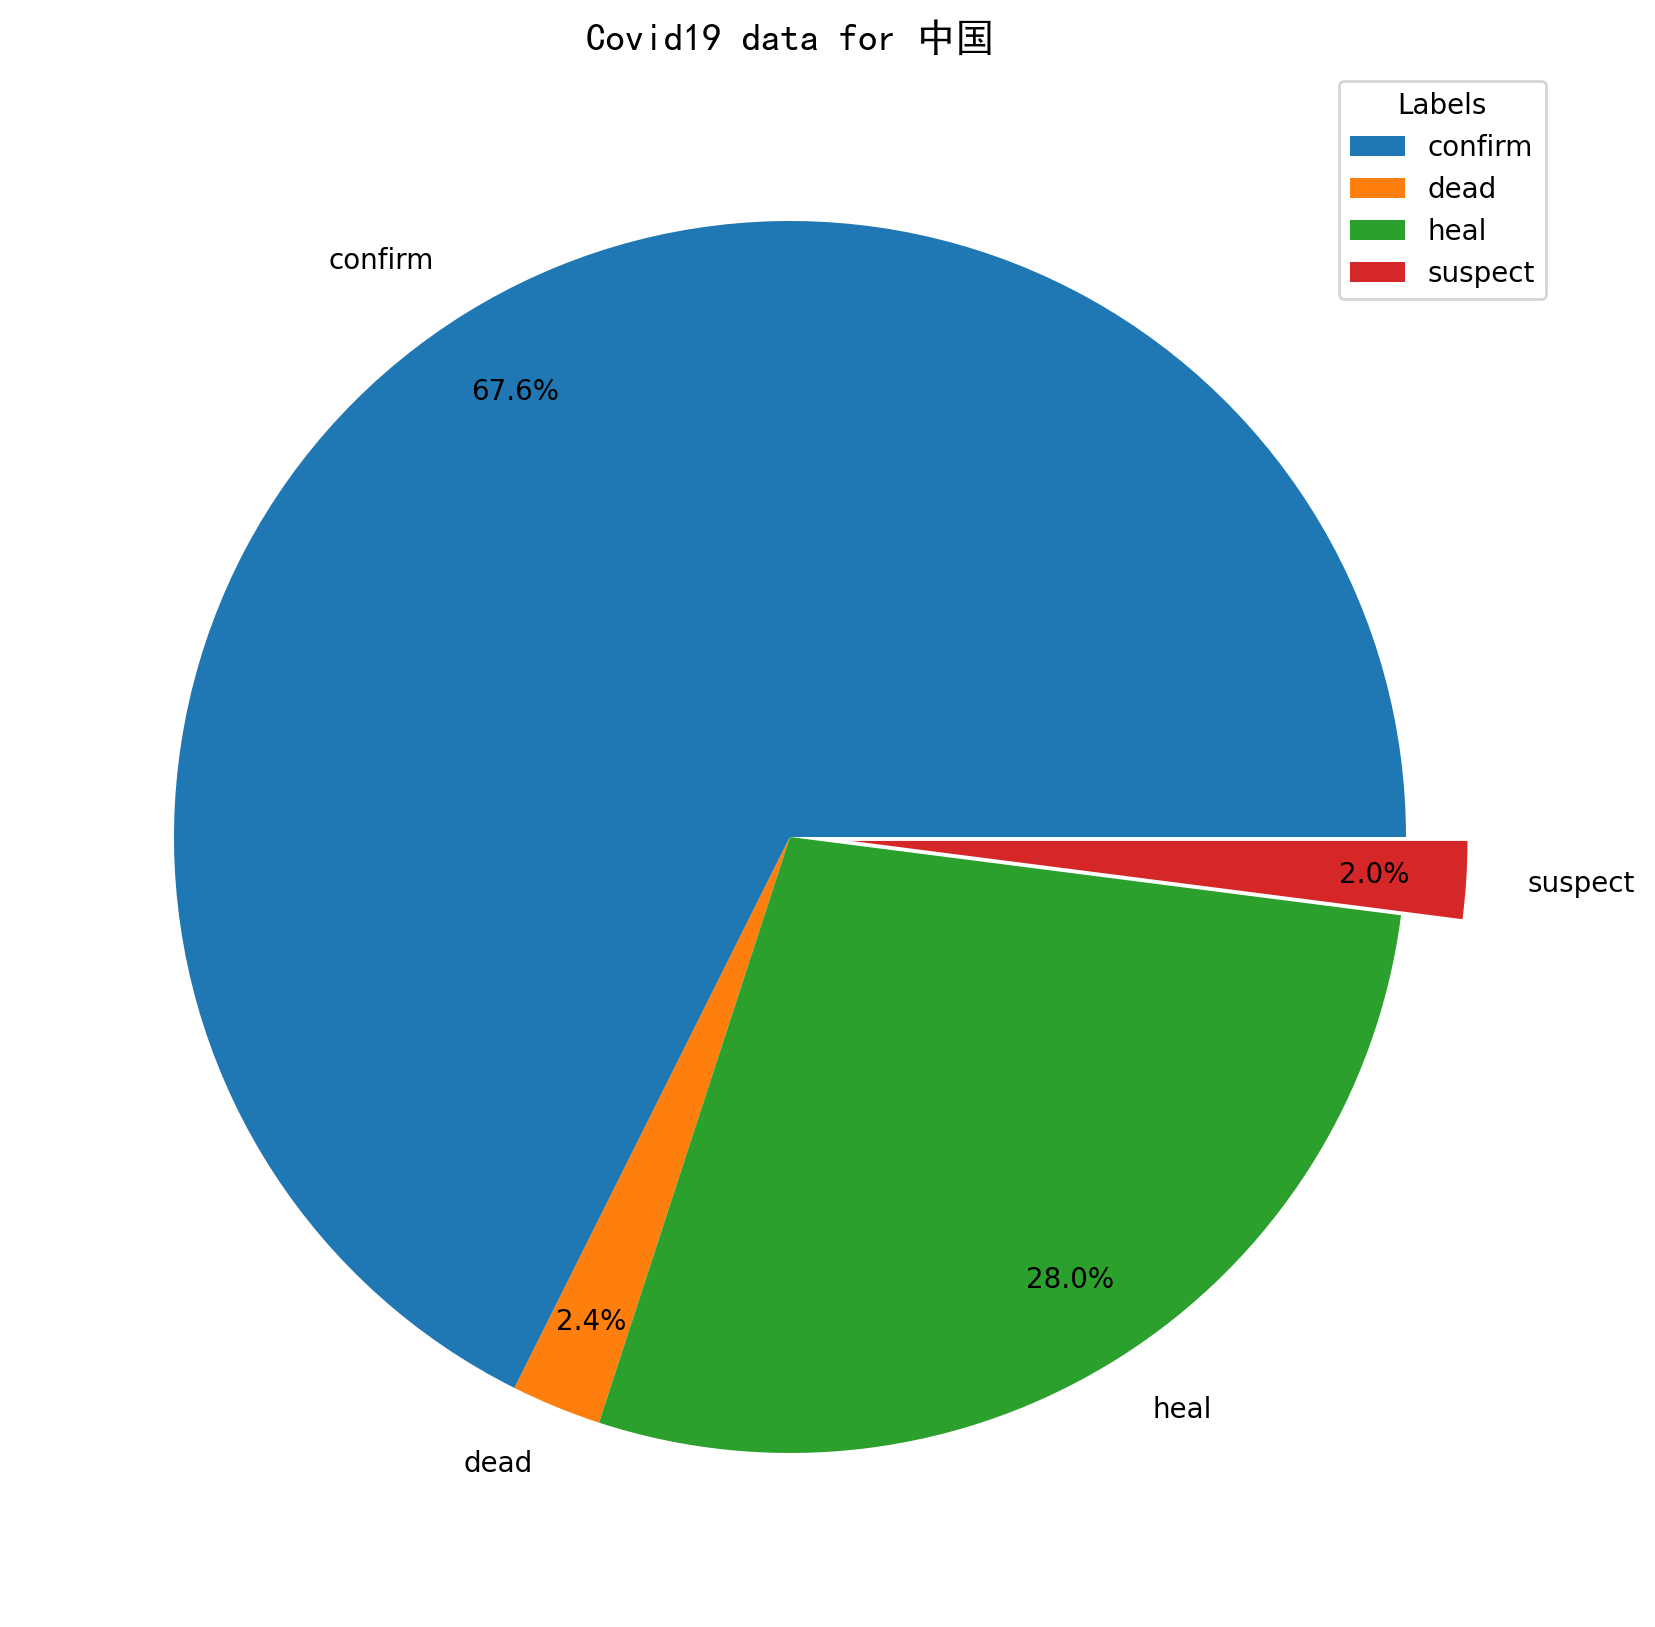

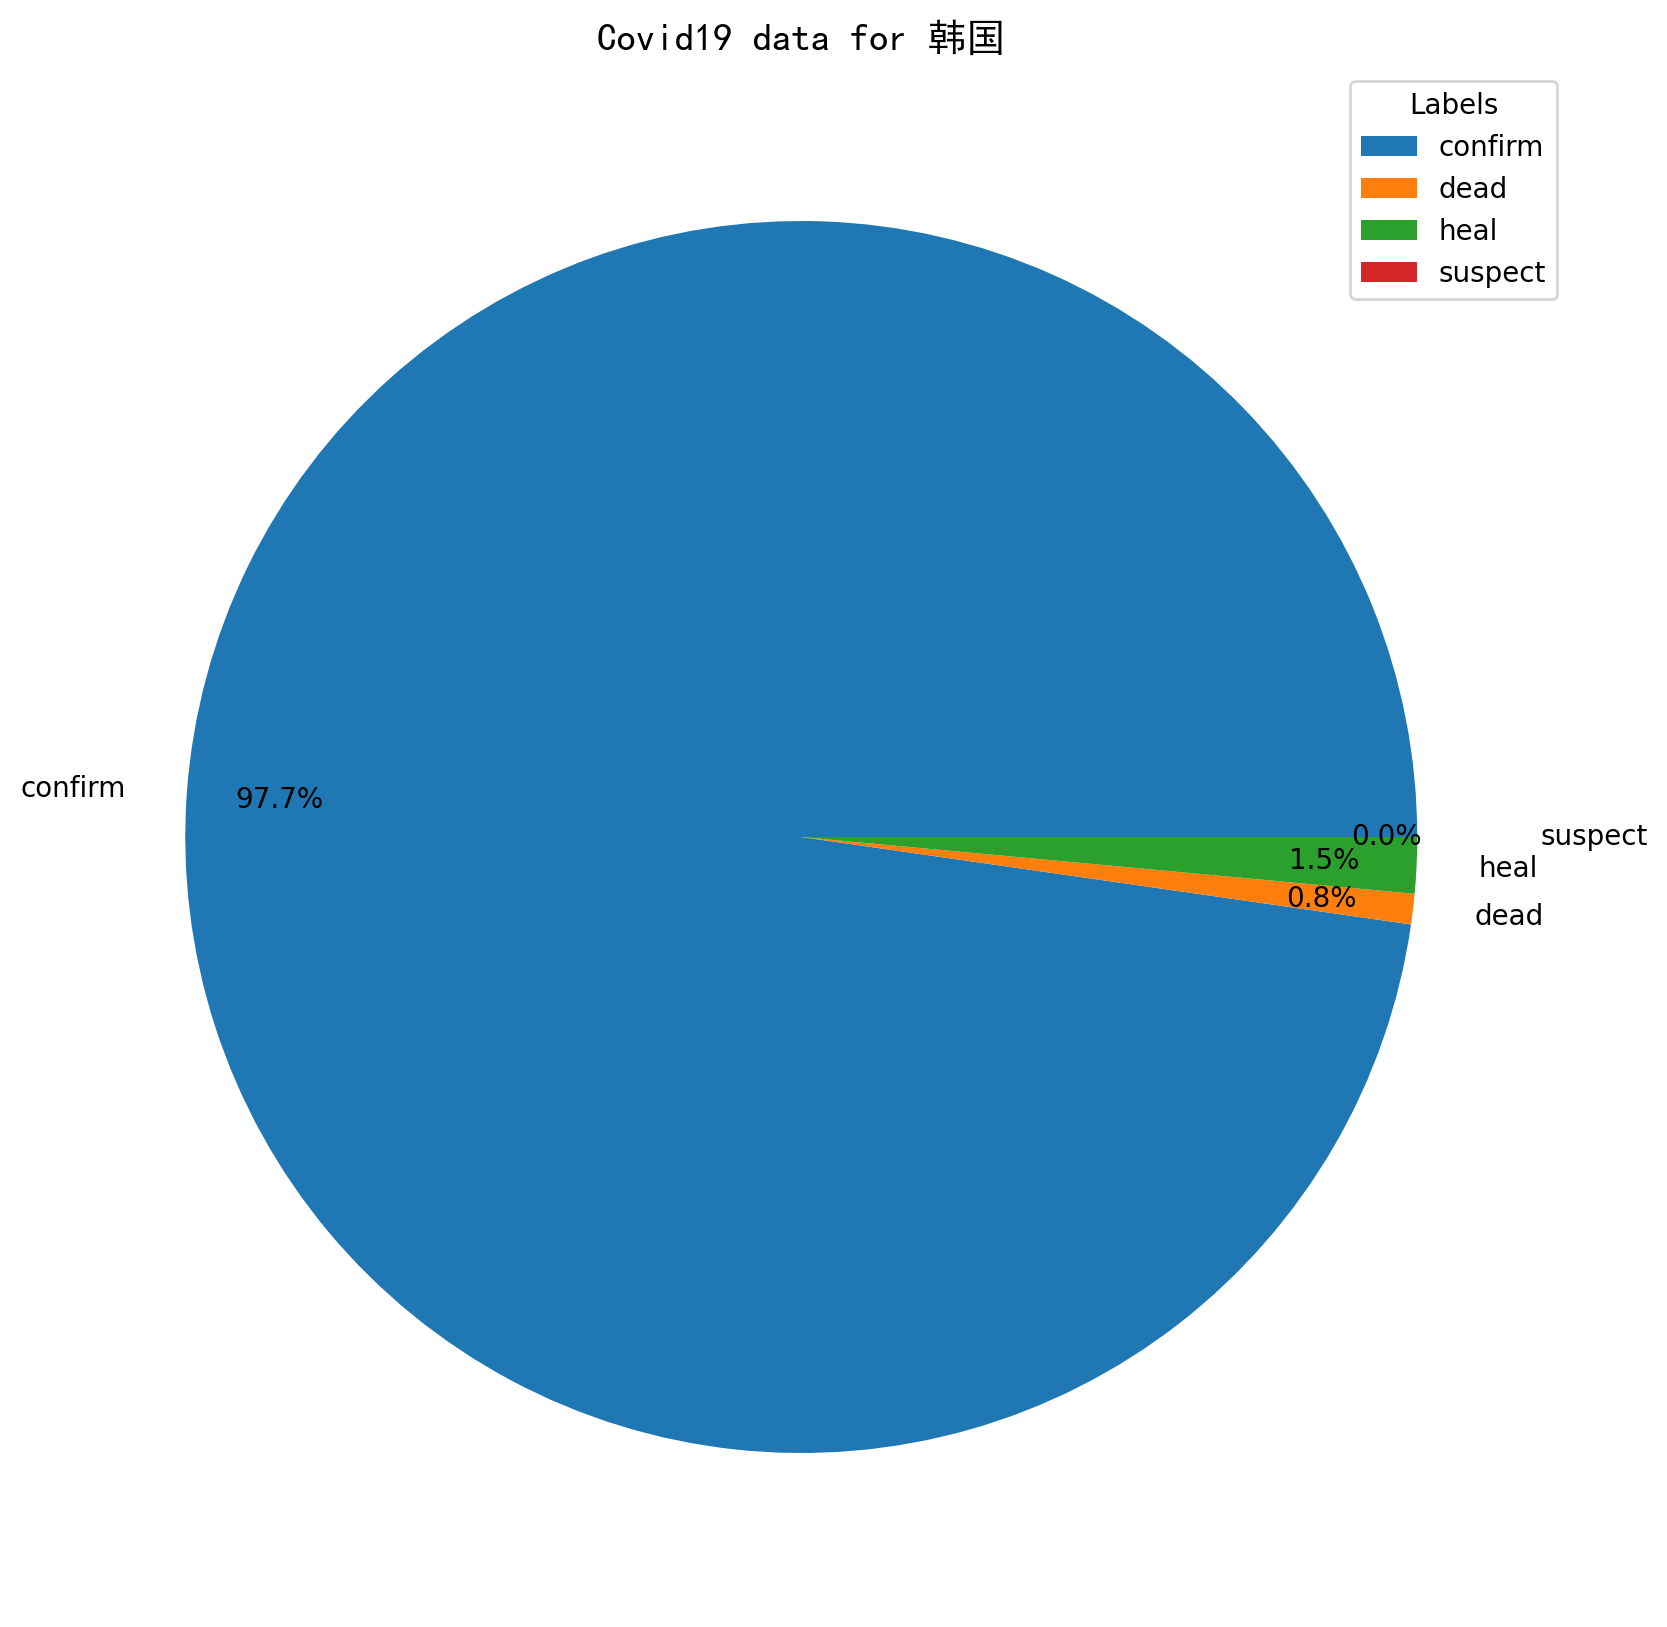

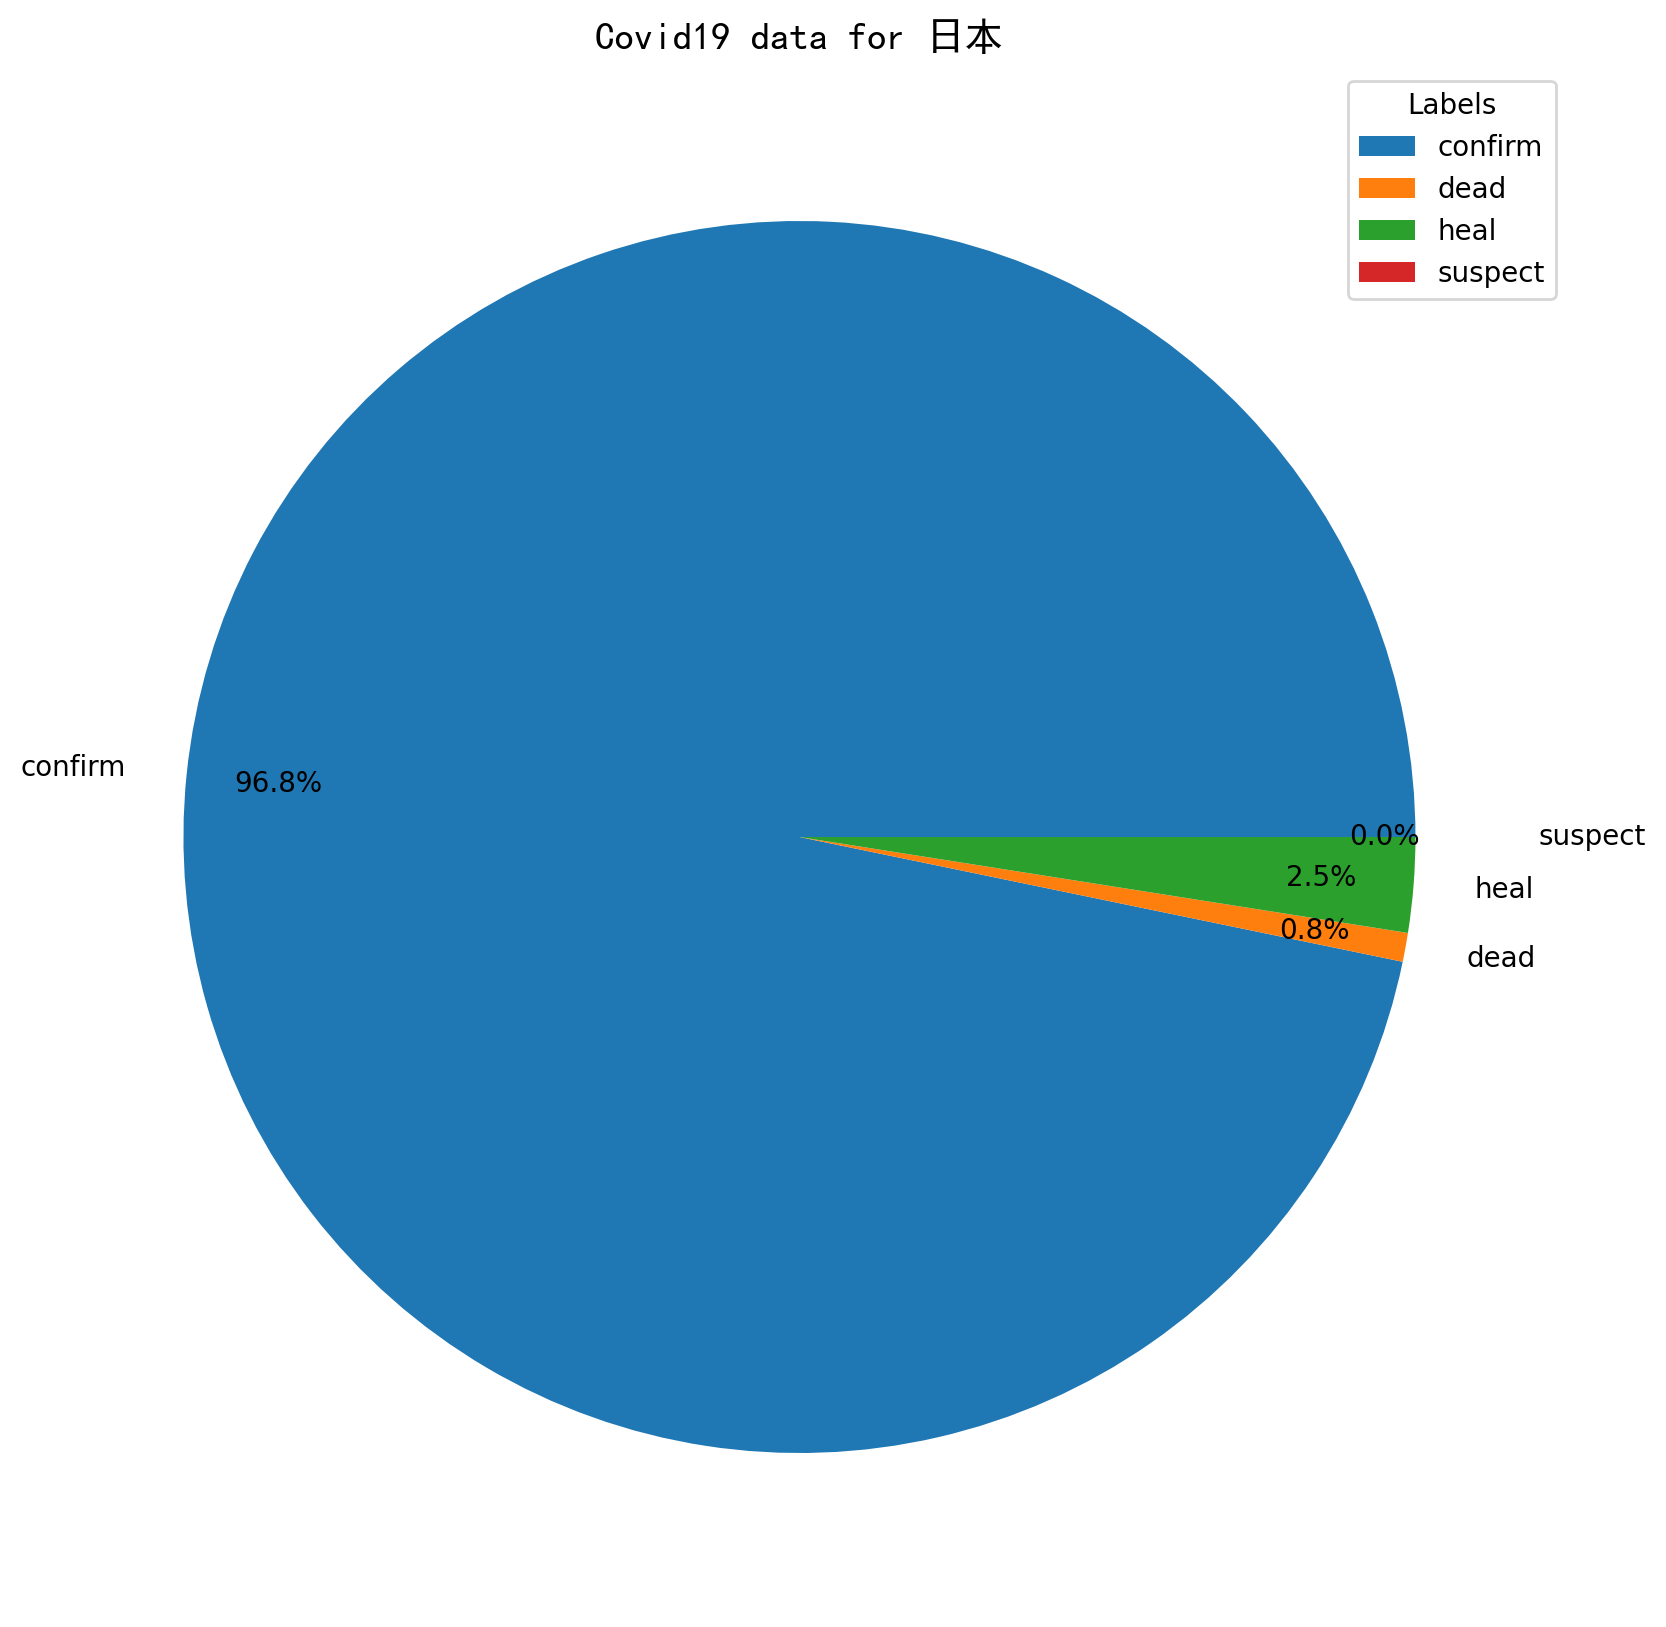

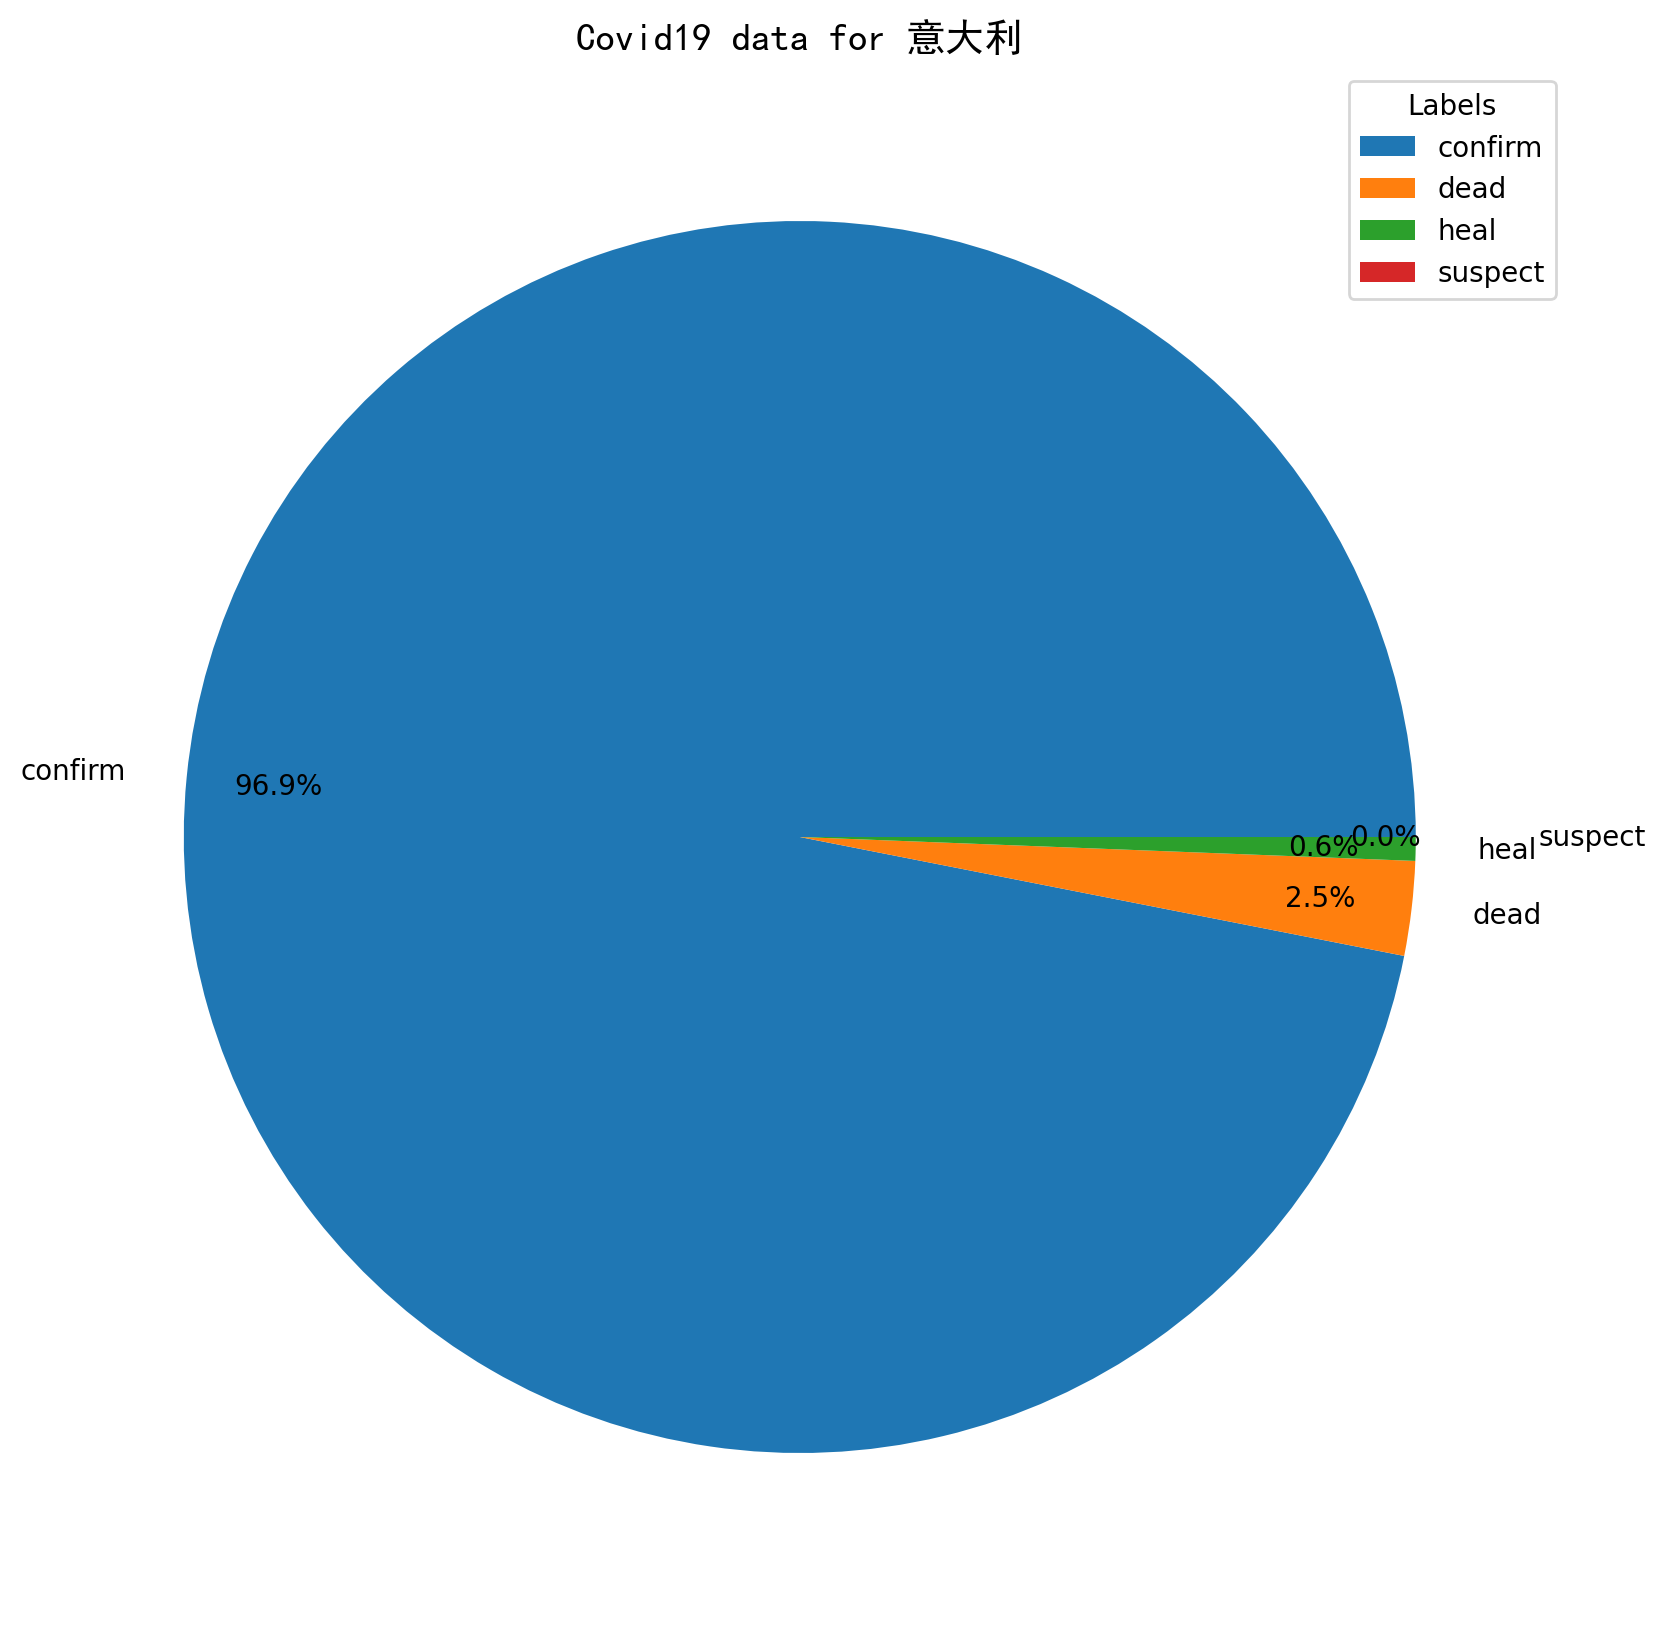

In [3]:
data = pd.read_excel('covid19_data.xls', sheet_name='data_world')

# confirm排序，选择前4个国家的数据
top_countries = data.sort_values('confirm', ascending=False).head(4)

# 绘制饼图
j = 0
for i, row in top_countries.iterrows():
  j = j + 1
  sizes = [row['confirm'], row['dead'], row['heal'], row['suspect']]
  labels = ['confirm', 'dead', 'heal', 'suspect']
  explode = (0, 0, 0, 0.1)  # 只对最后一部分进行偏移
  plt.figure(figsize=(10,10))
  plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, pctdistance=0.85)
  plt.title('Covid19 data for ' + row['country'], fontproperties=myfont)
  plt.legend(labels, title="Labels", loc="upper right")  # 添加图例
  plt.savefig('./images/饼图_{}.jpg'.format(j))
  plt.show()

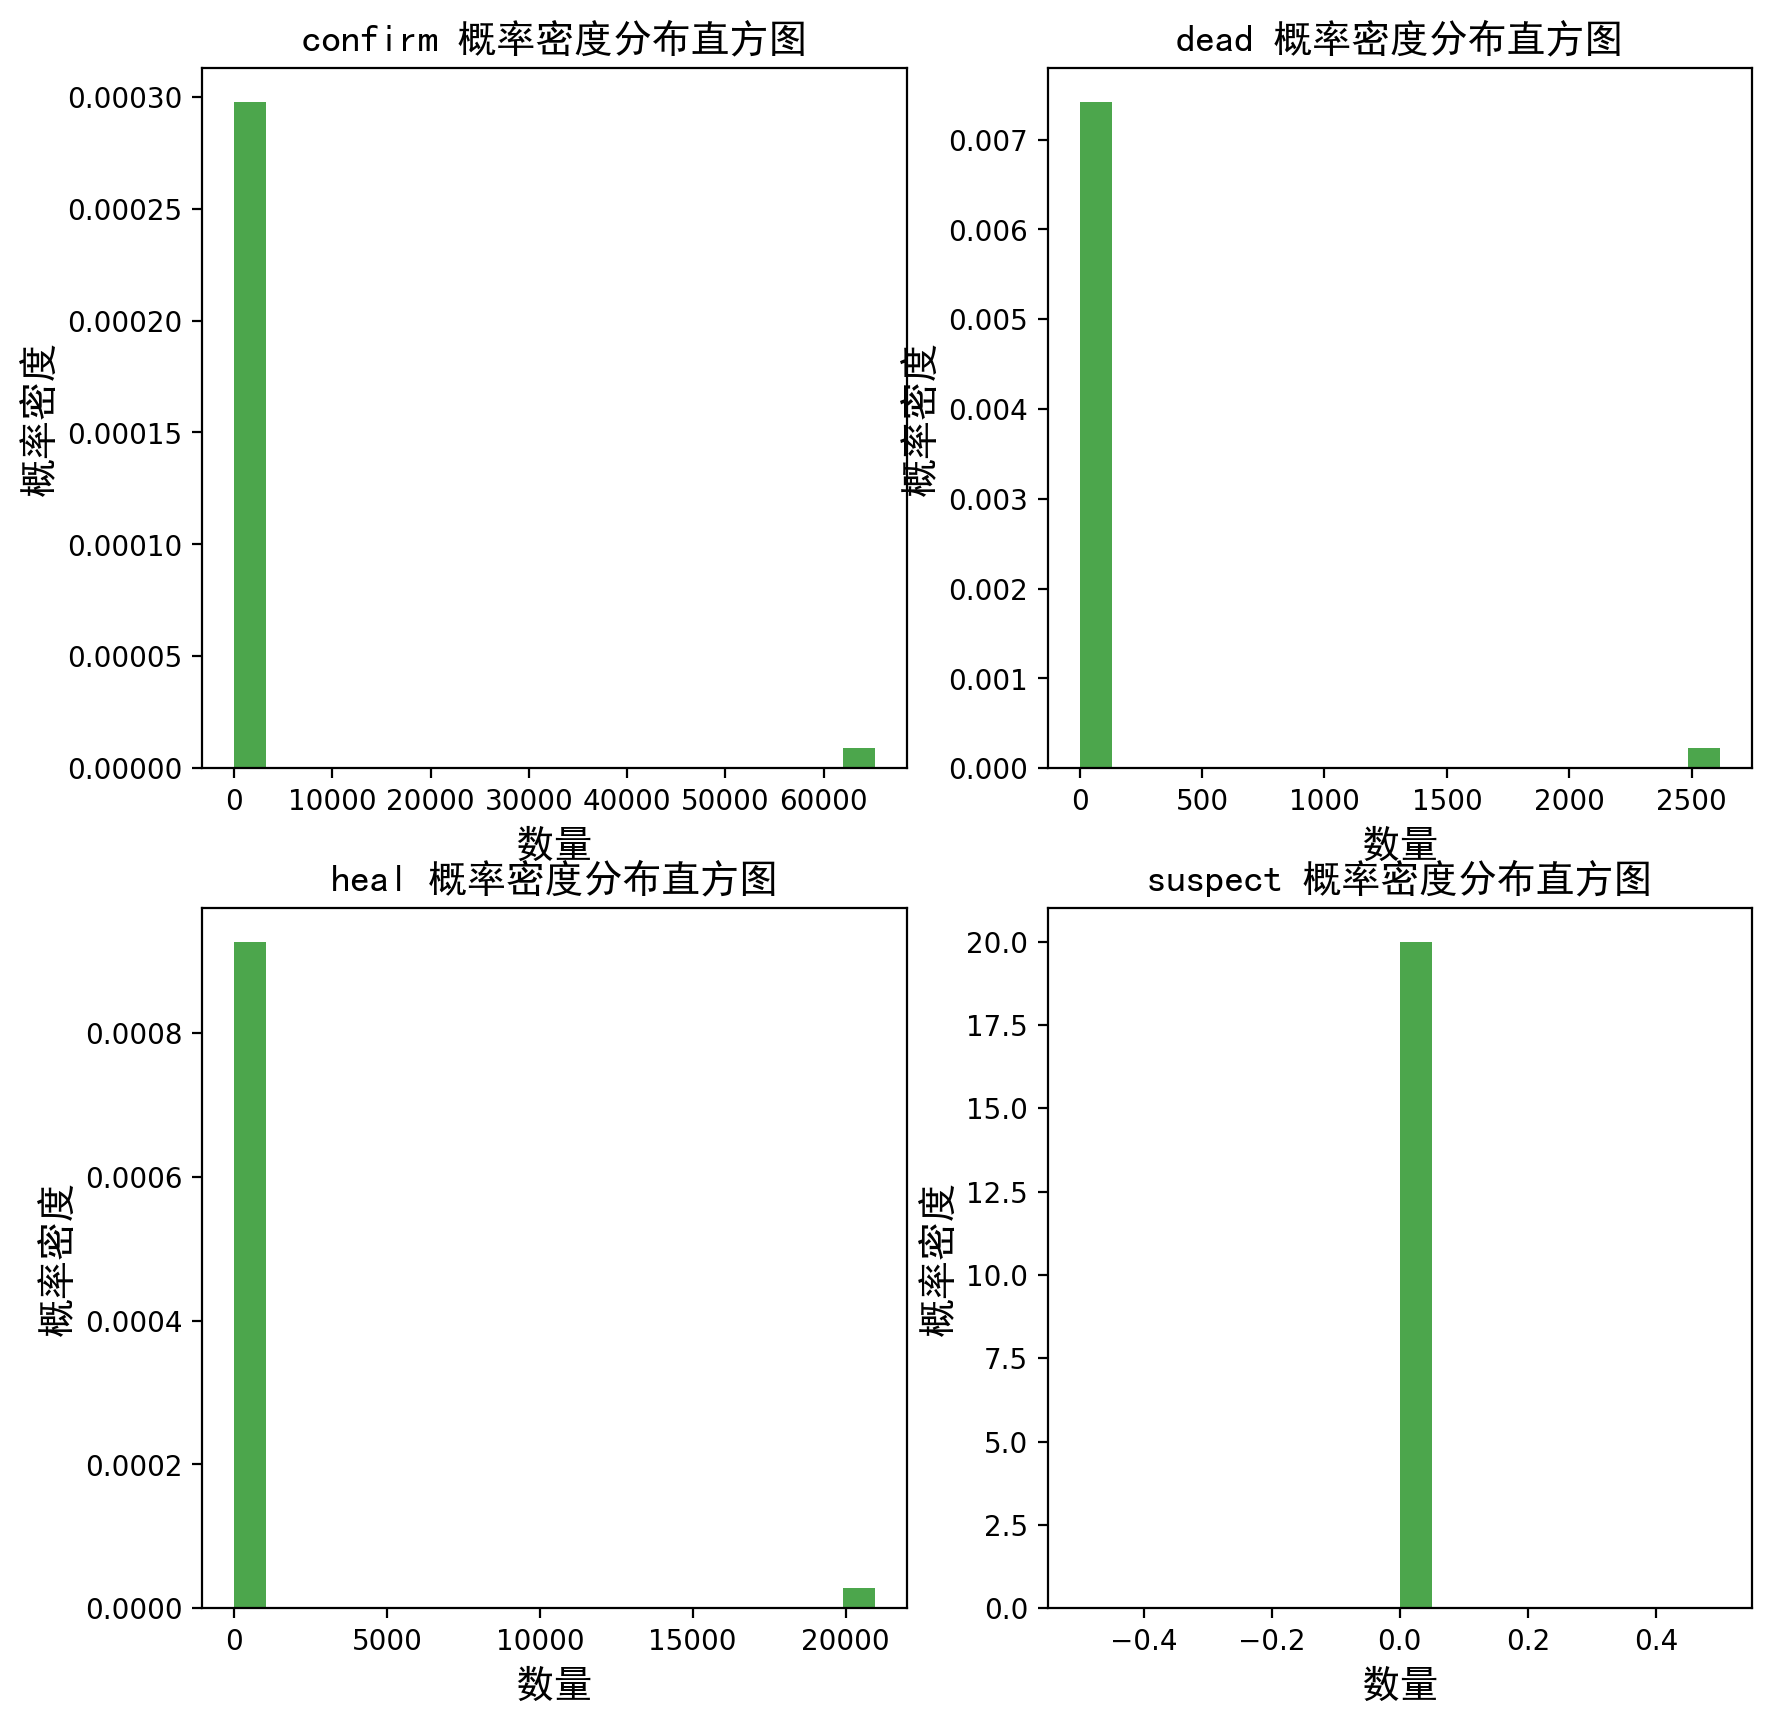

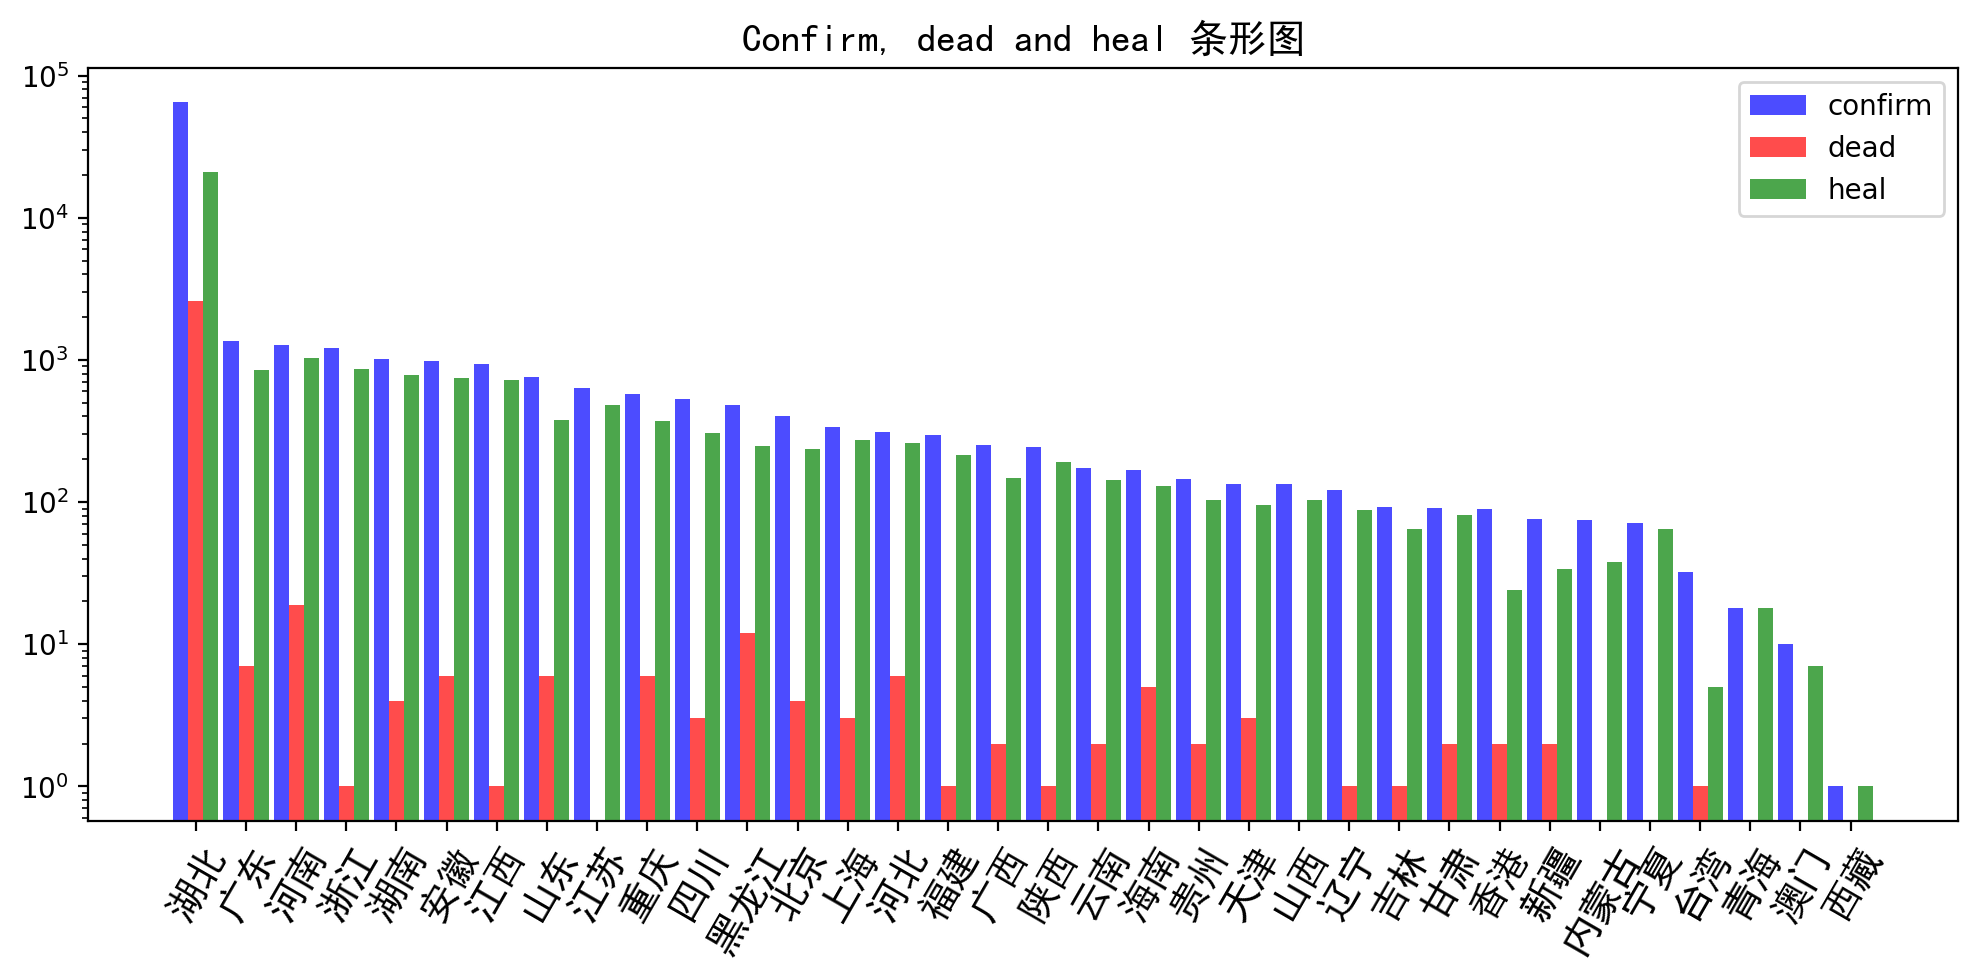

In [4]:
import numpy as np
# 读取数据
data = pd.read_excel('covid19_data.xls', sheet_name='current_prov')

# 创建一个新的figure对象，并使用subplot函数创建两个子图
fig, axs = plt.subplots(2, 2, figsize=(10,10))

columns = ['confirm', 'dead', 'heal', 'suspect']
for i in range(2):
    for j in range(2):
        axs[i, j].hist(data[columns[i*2+j]], bins=20, density=True, color='green', alpha=0.7)
        axs[i, j].set_title(columns[i*2+j] + ' 概率密度分布直方图', fontproperties=myfont)
        axs[i, j].set_xlabel('数量', fontproperties=myfont)
        axs[i, j].set_ylabel('概率密度', fontproperties=myfont)
# 保存本地
fig.savefig('./images/概率密度分布直方图.jpg')

fig, ax = plt.subplots(figsize=(10,5))

# 条形图
bar_width = 0.3
index = np.arange(len(data['province']))
ax.bar(index, data['confirm'], bar_width, color='blue', alpha=0.7, label='confirm')
ax.bar(index + bar_width, data['dead'], bar_width, color='red', alpha=0.7, label='dead')
ax.bar(index + 2 * bar_width, data['heal'], bar_width, color='green', alpha=0.7, label='heal')
ax.set_title('Confirm, dead and heal 条形图', fontproperties=myfont)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(data['province'], rotation=60, fontproperties=myfont)  # 使用指定的字体
ax.set_yscale('log')  # 设置纵坐标为对数尺度
ax.legend()

plt.tight_layout()
plt.savefig('./images/条形图.jpg')
plt.show()